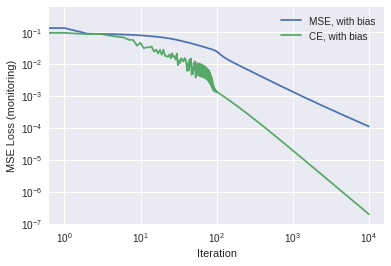

MSE _loss: Y_pred =
 [[0.98 0.00 0.00 0.00 0.00 0.00 0.01 0.01 0.02 0.01]
 [0.01 0.98 0.00 0.01 0.01 0.00 0.00 0.02 0.00 0.00]
 [0.00 0.00 0.99 0.01 0.00 0.00 0.00 0.00 0.02 0.00]
 [0.00 0.00 0.01 0.98 0.00 0.00 0.00 0.01 0.00 0.02]
 [0.00 0.01 0.00 0.00 0.99 0.00 0.00 0.00 0.02 0.02]
 [0.00 0.00 0.00 0.01 0.00 0.98 0.02 0.00 0.00 0.02]
 [0.01 0.00 0.00 0.00 0.00 0.01 0.98 0.00 0.02 0.00]
 [0.01 0.01 0.00 0.01 0.00 0.00 0.00 0.98 0.00 0.00]
 [0.01 0.00 0.01 0.00 0.00 0.00 0.01 0.00 0.96 0.01]
 [0.00 0.00 0.00 0.01 0.01 0.01 0.00 0.00 0.01 0.97]]
CE loss: Y_pred =
 [[1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
 [0.0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



X = np.array([ [1,1,1,1,1,1,1,0,1],  # 0
               [1,0,1,1,0,0,0,0,1],  # 1 
               [1,1,1,0,1,1,0,1,1],  # 2
               [1,1,1,1,1,0,0,1,1],  # 3
               [1,0,1,1,0,0,1,1,1],  # 4 
               [1,1,0,1,1,0,1,1,1],  # 5
               [1,1,0,1,1,1,1,1,1],  # 6 
               [1,1,1,1,0,0,0,0,1],  # 7 
               [1,1,1,1,1,1,1,1,1],  # 8 
               [1,1,1,1,1,0,1,1,1]   # 9 
                ])
Y = np.eye(10)


def sigmoid(x,deriv=False): 
  if(deriv==True):
    return x*(1-x)
  return 1/(1+np.exp(-x))

def calc_loss(Y_pred, Y, X, w, activ, loss_type="mse"):  # MSE loss
  diff = Y_pred - Y
  loss = (diff**2).mean()
  gradient = np.dot( X.T, diff*activ(Y_pred, deriv=True)) # for weight update
  return loss, gradient

  # we'll "overwrite" the earlier calc_loss function
def calc_loss(Y_pred, Y, X, w, activ, loss_type='ce'):
  diff = Y_pred - Y
  loss = (diff**2).mean()    # MSE loss
  if 'ce' == loss_type:
    diff = diff / (Y_pred*(1-Y_pred))     # use this for gradient
    # And actually, we don't care what the loss itself is. Let's use MSE loss for 'monitoring'
    #  If we wanted to, we'd compute the CE loss as follows:
    #loss = (-Y*np.log(Y_pred) + (1-Y)*np.log1p(-Y_pred)).sum()   # log1p(x) = log(1+x)
    
  gradient = np.dot( X.T, diff*activ(Y_pred, deriv=True))      # same as before
  return loss, gradient


np.random.seed(1)   # again for reproducibility 

# Compare old and new
w_mse, Y_pred_mse, loss_hist_mse = fit(X, Y, sigmoid, alpha=0.5, loss_type='mse')  
w_ce, Y_pred_ce, loss_hist_ce    = fit(X, Y, sigmoid, alpha=0.5, loss_type='ce')   # fit

plot_new_old(loss_hist_mse, loss_hist_ce, ["MSE, with bias", "CE, with bias"])
# And print the final answers:
print("MSE _loss: Y_pred =\n",Y_pred_mse)
print("CE loss: Y_pred =\n",Y_pred_ce)
